In [7]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re
from nltk.corpus import stopwords
import nltk
import pandas as pd
import numpy as np
import seaborn as sns


In [8]:
data = pd.read_csv("/content/dataLabeled.csv")
data.shape
data.drop_duplicates(inplace=True)

print("No of Unique Job Descriptions: ", data['Job_Description'].count())
nltk.download('stopwords')
stopword = stopwords.words('english')
print("Stopwords:", stopword)


No of Unique Job Descriptions:  1075
Stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
class_df = data.groupby('label').count()
class_df.style.background_gradient(cmap='PiYG')


,X,Title,Company,Location,Type,Salary,Contract_type,Job_Description,JobType,Industry,experience,exp_normailzed,type_norm,Contract_type_norm,salary1,salary_min,salary_max,salary_avg,salary_norm
label,,,,,,,,,,,,,,,,,,,
High,719,719,717,719,719,719,719,719,719,719,719,719,719,719,719,719,719,719,719
Low,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
Medium,336,336,334,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336


In [9]:
def clean(job):
    job = job.lower()  # lower case
    job = re.sub(r'https?://\S+|www\.\S+', " ", job)  # URL
    # job = re.sub(r'@\w+', ' ', job)  # mentions
    # job = re.sub(r'#\w+', ' ', job)  # hashtags
    job = re.sub(r'[^\w\s]', ' ', job)  # punctuations
    # job = re.sub(r'\d+', ' ', job)  # digits
    job = re.sub('\[.*?\]', ' ', job)  # any punctuations left
    # any others charcters other than numbers and letters
    job = re.sub("[^a-z0-9]", " ", job)
    job = job.split()  # stopwords
    job = " ".join([word for word in job if not word in stopword])
    return job

In [10]:
data.head

<bound method NDFrame.head of         X                                              Title  \
0      10                       Investment Banking Associate   
1      20       Associate Project Finance Investment Banking   
2      22  Senior Consultant - AML Transaction Monitoring...   
3      25                         Senior Relationship Banker   
4      31  Analyst, Global Corporate Investment Banking -...   
...   ...                                                ...   
1080  300                     Senior Data Analytics Engineer   
1081  302                 Power System Automation Specialist   
1082  303                                  Firmware Engineer   
1083  304                         Embedded Software Engineer   
1084  310                PSG Rotation Program Field Engineer   

                                  Company            Location           Type  \
0                              Q Advisors    Denver, CO 80202  Hybrid remote   
1                                    MUFG

In [12]:
data['Job_Description'] = data['Job_Description'].astype(
    str).apply(lambda x: clean(x))
data['Job_Description'].sample(5)

max_len = len(max(data['Job_Description'], key=len))
print("Maximum length of Job Decription:", max_len)

Maximum length of Job Decription: 19111


In [13]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [14]:
tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()


def lemmatize_jobs(job):
    temp = ""
    for w in tokenizer.tokenize(job):
        temp = temp + lemmatizer.lemmatize(w) + " "
    return temp


In [17]:
data['Job_Description'] = data['Job_Description'].apply(
    lambda x: lemmatize_jobs(x))

In [20]:
stemmer = PorterStemmer()

def stem_jobs(job):
    temp = ""
    for w in tokenizer.tokenize(job):
        temp = temp + stemmer.stem(w) + " "
    return temp


data['Job_Description'] = data['Job_Description'].apply(lambda x: stem_jobs(x))

x = data['Job_Description']
y = data['label']

In [21]:
train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

train_X.shape

(860,)

In [22]:
test_Y.shape

(215,)

In [23]:
encoder = LabelEncoder()
train_Y = encoder.fit_transform(train_Y)
test_Y = encoder.fit_transform(test_Y)

In [24]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3)).fit(train_X)
train_X_tfidf = vectorizer.transform(train_X)
test_X_tfidf = vectorizer.transform(test_X)

In [26]:
lr = LogisticRegression(penalty="l2", multi_class="multinomial", solver="saga", C=1)
lr.fit(train_X_tfidf, train_Y)
lr_pred = lr.predict(test_X_tfidf)
print("LR TFIDF Accuracy Score -> ", accuracy_score(lr_pred, test_Y)*100)

LR TFIDF Accuracy Score ->  80.93023255813954


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LR TFIDF F1 Score ->  0.5104043064278065
LR TFIDF Classification Report ->                precision    recall  f1-score   support

           0       0.80      0.96      0.87       144
           1       0.00      0.00      0.00         4
           2       0.86      0.54      0.66        67

    accuracy                           0.81       215
   macro avg       0.55      0.50      0.51       215
weighted avg       0.80      0.81      0.79       215



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


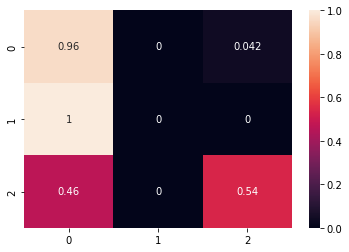

In [27]:
lr_cm = confusion_matrix(test_Y, lr_pred, normalize="true")
sns.heatmap(lr_cm, annot=True)
print("LR TFIDF F1 Score -> ", f1_score(test_Y, lr_pred, average='macro'))
print("LR TFIDF Classification Report -> ",
      classification_report(test_Y, lr_pred))